COVID-19 Data Exploration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv(r'E:\Projects DB\corona_virus\novel-corona-virus-2019-dataset\2019_nCoV_data.csv')
data.head(2)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0


In [3]:
df = data.copy()

In [4]:
for n in range(len(df)):
    if df['Country'][n] == 'Mainland China':
        df['Country'][n] = 'China'
    else:
        pass
    
df

C:\Users\PRASANNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [5]:
temp_date = []
for n in range(len(df)):
    temp_date.append(datetime.strptime(df['Date'][n], '%m/%d/%Y %H:%M:%S').date())
    
df = df.assign(Date_corrected = temp_date)
df = df.drop(['Date'], axis = 1)
df.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_corrected
0,1,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22
1,2,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,2020-01-22
2,3,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,2020-01-22
3,4,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22
4,5,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,2020-01-22


In [6]:
temp_2 = []
for n in range(len(df)):
    temp_3 = 10
    temp_3 = df['Date_corrected'][n].weekday()
    temp_2.append(calendar.day_name[temp_3])
    
df = df.assign(weekday = temp_2)
df.head(2)

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_corrected,weekday
0,1,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22,Wednesday
1,2,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,2020-01-22,Wednesday


In [7]:
df = df.copy()
a = df.groupby(['Date_corrected','Country'])['Confirmed'].sum()

In [8]:
country_var = df['Country'].unique()
country_var

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong',
       'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden',
       'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt'],
      dtype=object)

In [9]:
province_var = df['Province/State'].unique()
province_var

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'Bavaria', 'British Columbia',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'Toronto, ON', 'San Benito, CA', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX'], dtype=object)

In [10]:
date_var = df['Date_corrected'].unique()
date_var

array([datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1), datetime.date(2020, 2, 2),
       datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 6),
       datetime.date(2020, 2, 7), datetime.date(2020, 2, 8),
       datetime.date(2020, 2, 9), datetime.date(2020, 2, 10),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 12),
       datetime.date(2020, 2, 13), datetime.date(2020, 2, 14),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17)], dtype=object)

Spread of Confirmed Cases 

C:\Users\PRASANNA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


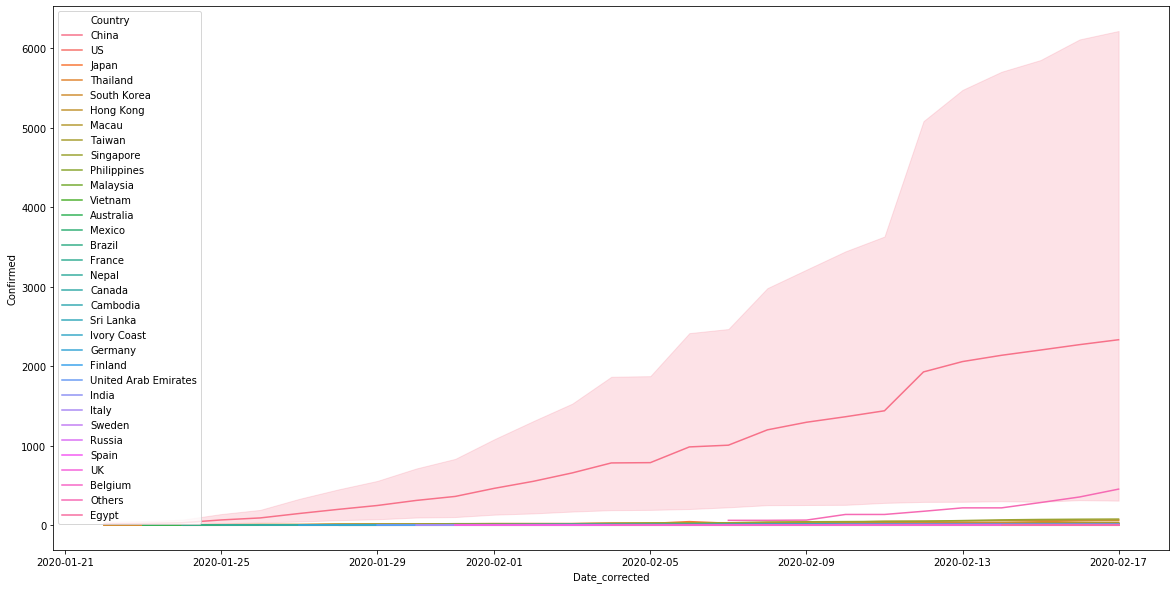

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date_corrected',y='Confirmed',hue='Country',data=df)   


Death Rate Pattern

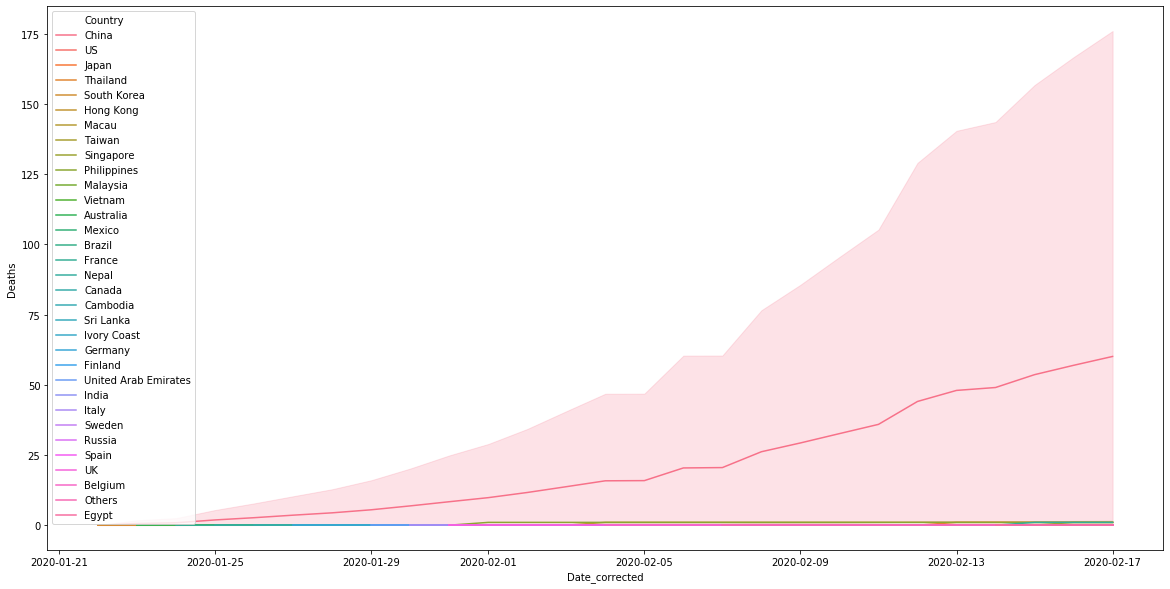

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date_corrected',y='Deaths',hue='Country',data=df)   


Recovery Pattern

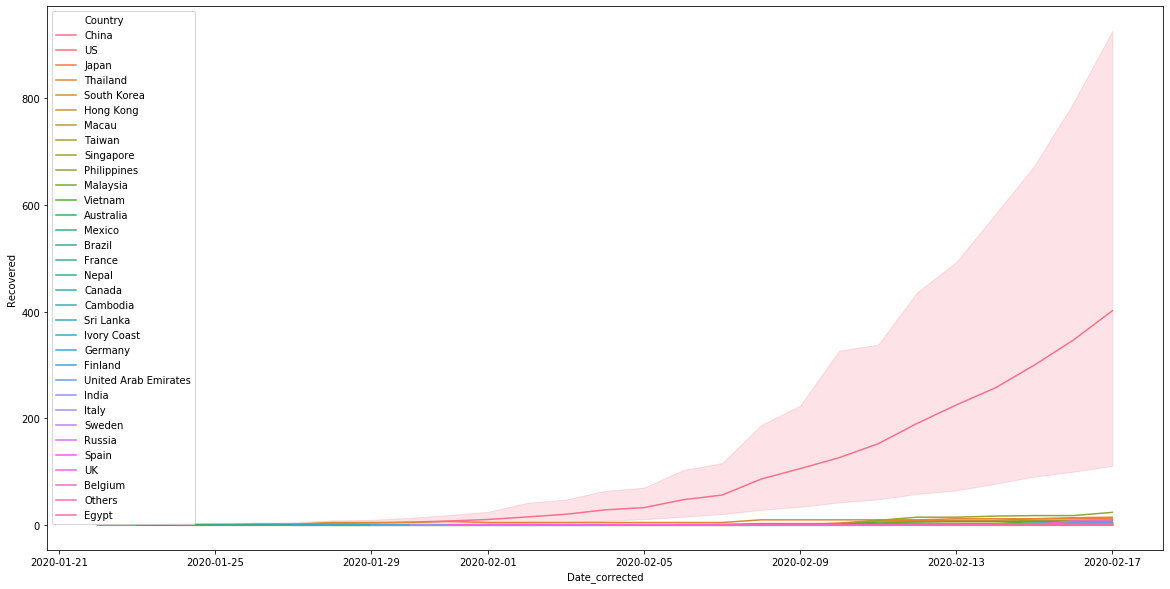

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date_corrected',y='Recovered',hue='Country',data=df)   


Current Status as on 17/02/2020

In [13]:
from datetime import date
year = 2020
month = 2
day = 16

df_latest = df[df['Date_corrected'] == pd.Timestamp(date(year,month,day))]
df_latest.head(75)

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_corrected,weekday
1569,1570,Hubei,China,2020-02-16T23:53:01,58182.0,1696.0,6639.0,2020-02-16,Sunday
1570,1571,Guangdong,China,2020-02-16T12:03:06,1316.0,2.0,465.0,2020-02-16,Sunday
1571,1572,Henan,China,2020-02-16T13:53:03,1231.0,13.0,440.0,2020-02-16,Sunday
1572,1573,Zhejiang,China,2020-02-16T09:33:02,1167.0,0.0,456.0,2020-02-16,Sunday
1573,1574,Hunan,China,2020-02-16T13:13:04,1004.0,3.0,464.0,2020-02-16,Sunday
1574,1575,Anhui,China,2020-02-16T08:33:02,962.0,6.0,255.0,2020-02-16,Sunday
1575,1576,Jiangxi,China,2020-02-16T10:03:06,925.0,1.0,240.0,2020-02-16,Sunday
1576,1577,Jiangsu,China,2020-02-16T09:33:02,617.0,0.0,218.0,2020-02-16,Sunday
1577,1578,Chongqing,China,2020-02-16T23:53:01,551.0,5.0,207.0,2020-02-16,Sunday
1578,1579,Shandong,China,2020-02-16T12:03:06,537.0,2.0,173.0,2020-02-16,Sunday


In [14]:
df_latest.groupby('Country')['Confirmed'].sum()

Country
Australia                  15.0
Belgium                     1.0
Cambodia                    1.0
Canada                      7.0
China                   70446.0
Egypt                       1.0
Finland                     1.0
France                     12.0
Germany                    16.0
Hong Kong                  57.0
India                       3.0
Italy                       3.0
Japan                      59.0
Macau                      10.0
Malaysia                   22.0
Nepal                       1.0
Others                    355.0
Philippines                 3.0
Russia                      2.0
Singapore                  75.0
South Korea                29.0
Spain                       2.0
Sri Lanka                   1.0
Sweden                      1.0
Taiwan                     20.0
Thailand                   34.0
UK                          9.0
US                         15.0
United Arab Emirates        9.0
Vietnam                    16.0
Name: Confirmed, dtype: float64

Loading Co-ordinates of countries

In [15]:
w_data = pd.read_csv(r'E:\Projects DB\corona_virus\world-coordinates\world_coordinates.csv')
w_data.head(10)

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615
5,AL,Albania,41.153332,20.168331
6,AM,Armenia,40.069099,45.038189
7,AN,Netherlands Antilles,12.226079,-69.060087
8,AO,Angola,-11.202692,17.873887
9,AQ,Antarctica,-75.250973,-0.071389


In [21]:
world_data = pd.merge(df_latest[['Country','Confirmed','Deaths','Recovered']],w_data,on='Country')
world_data

,Country,Confirmed,Deaths,Recovered,Code,latitude,longitude
0,China,58182.0,1696.0,6639.0,CN,35.861660,104.195397
1,China,1316.0,2.0,465.0,CN,35.861660,104.195397
2,China,1231.0,13.0,440.0,CN,35.861660,104.195397
3,China,1167.0,0.0,456.0,CN,35.861660,104.195397
4,China,1004.0,3.0,464.0,CN,35.861660,104.195397
5,China,962.0,6.0,255.0,CN,35.861660,104.195397
6,China,925.0,1.0,240.0,CN,35.861660,104.195397
7,China,617.0,0.0,218.0,CN,35.861660,104.195397
8,China,551.0,5.0,207.0,CN,35.861660,104.195397
9,China,537.0,2.0,173.0,CN,35.861660,104.195397


In [23]:
world_data_latest = pd.DataFrame(world_data.groupby('Country')['Confirmed'].sum())
world_data_latest

,Confirmed
Country,
Australia,15.0
Belgium,1.0
Cambodia,1.0
Canada,7.0
China,70446.0
Egypt,1.0
Finland,1.0
France,12.0
Germany,16.0


In [24]:
w_d = pd.merge(world_data_latest,w_data,on='Country')
w_d

,Country,Confirmed,Code,latitude,longitude
0,Australia,15.0,AU,-25.274398,133.775136
1,Belgium,1.0,BE,50.503887,4.469936
2,Cambodia,1.0,KH,12.565679,104.990963
3,Canada,7.0,CA,56.130366,-106.346771
4,China,70446.0,CN,35.861660,104.195397
5,Egypt,1.0,EG,26.820553,30.802498
6,Finland,1.0,FI,61.924110,25.748151
7,France,12.0,FR,46.227638,2.213749
8,Germany,16.0,DE,51.165691,10.451526
9,Hong Kong,57.0,HK,22.396428,114.109497


In [25]:
import folium

In [26]:
map = folium.Map(location=(0,0),zoom_start=1.5)

In [27]:
from folium.plugins import HeatMap

HeatMap(data=w_d[['latitude','longitude', 'Confirmed']]).add_to(map)
display(map)